# A Pandas Prolation Canon

### introduction
This notebook creates a prolation canon from monophonic input line. It assumes that successive voice durations will be scaled by some increasing power, as specified in the input argument `augmentation_base`, i.e., a base of 2 would create relationships of twice or half as long between staves, a base of 3 relationships of three times or a third, etc.

### imports

In [1]:
import abjad
import pandas as pd

In [2]:
%load_ext abjadext.ipython

### stretch a single container - mutate is broken

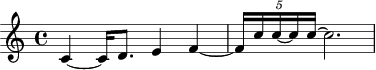

In [277]:
container = abjad.Container(r"c' ~ c'16 d'8. e'4 f' ~ \times 4/5 {f'16 c'' c'' ~ c'' c'' ~ } c''2.")
abjad.show(container)

The result should be one measure long, but it's a bit longer than it should be, because an F4 remains a quarter note:

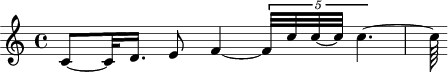

In [278]:
abjad.mutate(container).scale(abjad.Multiplier(1,2))
abjad.show(container)

The result should be:

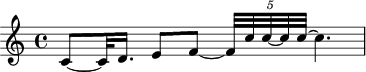

In [279]:
correct = abjad.Container(r"c'8 ~ c'32 d'16. e'8 f' ~ \times 4/5 {f'32 c'' c'' ~ c'' c'' ~ } c''4.")
abjad.show(correct)

### _TODO: After fixing `Mutation.scale`, replace `stretch_container` to use `Mutation.scale` below_

In [227]:
maker = abjad.LeafMaker()
maker([0], [(5,2)])

Selection([Note("c'\\breve"), Note("c'2")])

In [280]:
def stretch_container(input_container, factor):
    return abjad.Container([abjad.Note.from_pitch_and_duration(
                            note.written_pitch, 
                            note.written_duration * factor) 
                            for note in abjad.iterate(input_container).leaves()])

In [221]:
stretch_container(container, 2)

LogicalTie([Note("c'4"), Note("c'16")])
LogicalTie([Note("d'8.")])
LogicalTie([Note("e'4")])
LogicalTie([Note("f'4")])
LogicalTie([Note("c''4")])
LogicalTie([Note("c''4")])
LogicalTie([Note("c''4")])


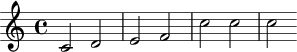

In [209]:
stretch_container(input_container, 2)
abjad.show(stretched_container)

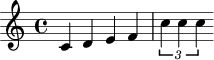

In [203]:
container = abjad.Container(r"c' d' e' f' \times 2/3 {c'' c'' c''}")
abjad.show(container)

In [180]:
for obj in container:
    print(isinstance(obj, abjad.Note))

True
True
True
True
False


In [181]:
stretched_container = stretch_container(container, 2)

AttributeError: 'Inspection' object has no attribute 'leaves'

Instead, we need to iterate through the leaves at the lowest level of the tree, not the objects immediately contained by the container (because the container contains a tuplet container which itself contains the diminished notes).

In [184]:
for leaf in abjad.iterate(container).leaves():
    print(leaf)

c'4
d'4
e'4
f'4
c''4
c''4
c''4


In [189]:
def stretch_container(input_container, factor):
    for leaf in abjad.iterate(input_container).leaves():
        
    return abjad.Container([abjad.Note.from_pitch_and_duration(
                            note.written_pitch, 
                            note.written_duration * factor) 
                            for note in abjad.iterate(input_container).leaves()])

In [190]:
stretched_container = stretch_container(container, 2)

In [193]:
tuplet = abjad.Tuplet((2,3), "c' d' e'")

In [197]:
tuplet.multiplier * 2

Multiplier(4, 3)

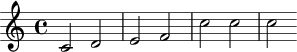

In [191]:
abjad.show(stretched_container)

In [186]:
def prolate_input_container(i, input_container, augmentation_base):
    stretch_factor = augmentation_base/(2**i)
    prolated_container = stretch_container(abjad.mutate(input_container).copy(), stretch_factor)
    return prolated_container

def make_empty_score(num_voices):
    score = abjad.Score()
    for i in range(num_voices):
        score.append(abjad.Staff())
    return score

def fill_staff_with_copies_of_prolated_container(i, staff, prolated_container):
    containers = [abjad.mutate(prolated_container).copy() * (2**i)]
    staff.extend(containers)

def make_prolation_canon(input_container, num_voices, augmentation_base=2):
    score = make_empty_score(num_voices)
    for i, staff in enumerate(score):
        prolated_container = prolate_input_container(i, input_container, augmentation_base)
        fill_staff_with_copies_of_prolated_container(i, staff, prolated_container)
    return score

In [187]:
input_container = abjad.Container("c'1 d' e' f'")

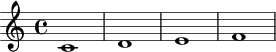

In [162]:
abjad.show(input_container)

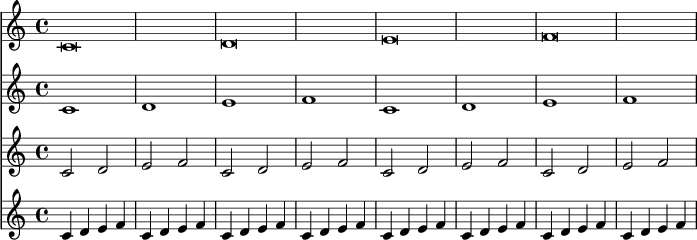

In [163]:
skeleton = make_prolation_canon(input_container, 4)
abjad.show(skeleton)

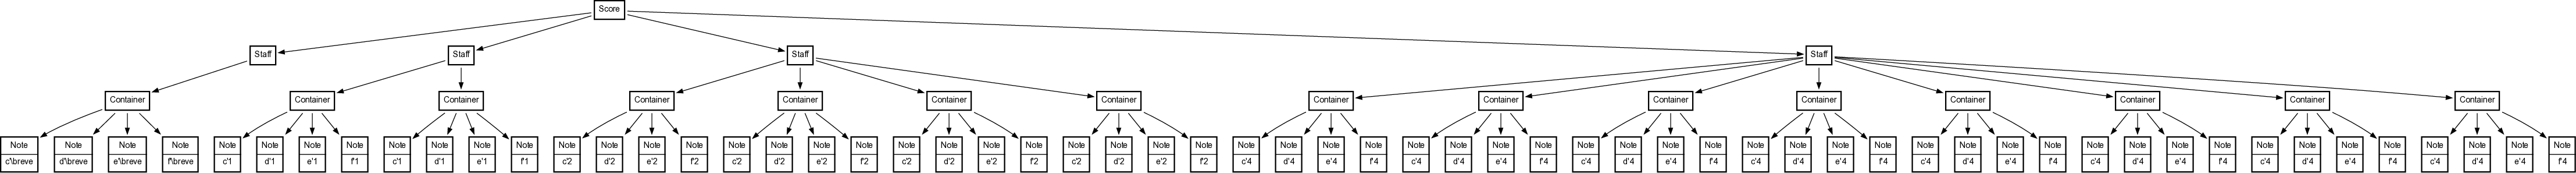

In [164]:
abjad.graph(skeleton)